<table align="left">
  <td>
    <a href="https://colab.research.google.com/drive/1CgZLW0IhOBSsf9fkKSrj8YQjNRhTmC5Y" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

# **El problema del viajante**

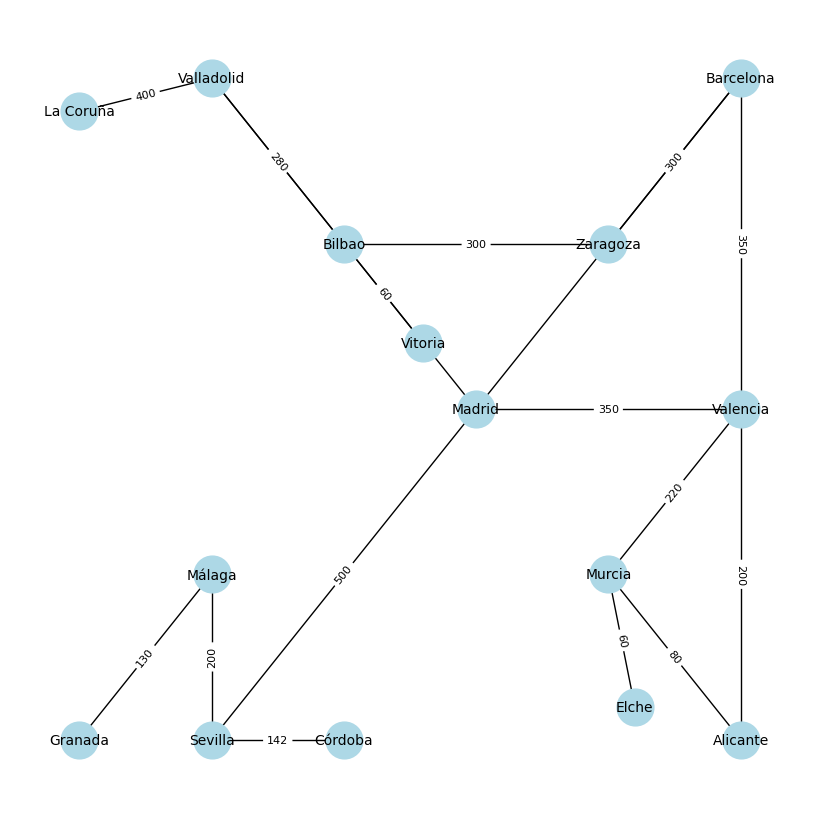

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Crear un grafo vacío
G = nx.Graph()

# Añadir vértices (ciudades)
ciudades = ['Madrid', 'Barcelona', 'Valencia', 'Sevilla', 'Zaragoza', 'Málaga',
            'Murcia', 'Bilbao', 'Alicante', 'Córdoba',
            'Valladolid', 'La Coruña',
            'Vitoria', 'Granada', 'Elche']

G.add_nodes_from(ciudades)

# Añadir aristas con distancias (en km, valores ficticios)
conexiones = [
    ('Madrid', 'Barcelona', 600),
    ('Madrid', 'Valencia', 350),
    ('Madrid', 'Sevilla', 500),
    ('Barcelona', 'Valencia', 350),
    ('Barcelona', 'Zaragoza', 300),
    ('Valencia', 'Alicante', 200),
    ('Sevilla', 'Málaga', 200),
    ('Málaga', 'Granada', 130),
    ('Zaragoza', 'Bilbao', 300),
    ('Bilbao', 'Vitoria', 60),
    ('Bilbao', 'Valladolid', 280),
    ('Valladolid', 'Madrid', 190),
    ('Alicante', 'Murcia', 80),
    ('Murcia', 'Elche', 60),
    ('Murcia', 'Valencia', 220),
    ('La Coruña', 'Valladolid', 400),
    ("Sevilla", "Córdoba", 142)
]

for ciudad1, ciudad2, distancia in conexiones:
    G.add_edge(ciudad1, ciudad2, weight=distancia)

# Posiciones de los nodos ajustadas manualmente para evitar solapamiento
pos = {
    'Madrid': (0, 0),
    'Barcelona': (1, 1),
    'Valencia': (1, 0),
    'Sevilla': (-1, -1),
    'Zaragoza': (0.5, 0.5),
    'Málaga': (-1, -0.5),
    'Murcia': (0.5, -0.5),
    'Bilbao': (-0.5, 0.5),
    'Alicante': (1, -1),
    'Córdoba': (-0.5, -1),
    'Valladolid': (-1, 1),
    'Hospitalet de Llobregat': (1.5, 0.7),
    'La Coruña': (-1.5, 0.9),
    'Vitoria': (-0.2, 0.2),
    'Granada': (-1.5, -1),
    'Elche': (0.6, -0.9)
}

def completar_grafo(G):
    nodos = list(G.nodes())
    for i in range(len(nodos)):
        for j in range(i+1, len(nodos)):
            nodo_i = nodos[i]
            nodo_j = nodos[j]
            if not G.has_edge(nodo_i, nodo_j):
                try:
                    # Calcula la distancia más corta usando el algoritmo de Dijkstra
                    distancia = nx.shortest_path_length(G, source=nodo_i, target=nodo_j, weight='weight')
                except nx.NetworkXNoPath:
                    distancia = float('inf')  # No hay un camino entre nodo_i y nodo_j

                G.add_edge(nodo_i, nodo_j, weight=distancia)


# Dibujar el grafo
plt.figure(figsize=(8, 8))
labels = nx.get_edge_attributes(G, 'weight')
nx.draw(G, pos, with_labels=True, node_color='lightblue', font_size=10, node_size=700)
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=8)

plt.show()


In [ ]:
import copy

def completar_grafo(G_original):
    G_completo = copy.deepcopy(G_original)
    nodos = list(G_completo.nodes())
    for i in range(len(nodos)):
        for j in range(i+1, len(nodos)):
            nodo_i = nodos[i]
            nodo_j = nodos[j]
            if not G_completo.has_edge(nodo_i, nodo_j):
                try:
                    # Calcula la distancia más corta usando el algoritmo de Dijkstra
                    distancia = nx.shortest_path_length(G_original, source=nodo_i, target=nodo_j, weight='weight')
                except nx.NetworkXNoPath:
                    distancia = float('inf')  # No hay un camino entre nodo_i y nodo_j

                G_completo.add_edge(nodo_i, nodo_j, weight=distancia)
    return G_completo


In [ ]:
def resolver_tsp(G, nodo_inicial):
    # Calcular el ciclo del viajante de comercio más corto utilizando el algoritmo de aproximación
    ciclo = nx.approximation.greedy_tsp(G, weight='weight', source="Madrid")

    coste = sum(G[n][nbr]["weight"] for n, nbr in nx.utils.pairwise(ciclo))

    return ciclo, coste

nodo_inicial = 'Madrid'
ciclo, distancia_total = resolver_tsp(completar_grafo(G), nodo_inicial)

print(f"Orden de visita: {ciclo}")
print(f"Distancia total: {distancia_total} km")

Orden de visita: ['Madrid', 'Valladolid', 'Bilbao', 'Vitoria', 'Zaragoza', 'Barcelona', 'Valencia', 'Alicante', 'Murcia', 'Elche', 'Sevilla', 'Córdoba', 'Málaga', 'Granada', 'La Coruña', 'Madrid']
Distancia total: 5634 km


# **Árbol a partir de un grafo**

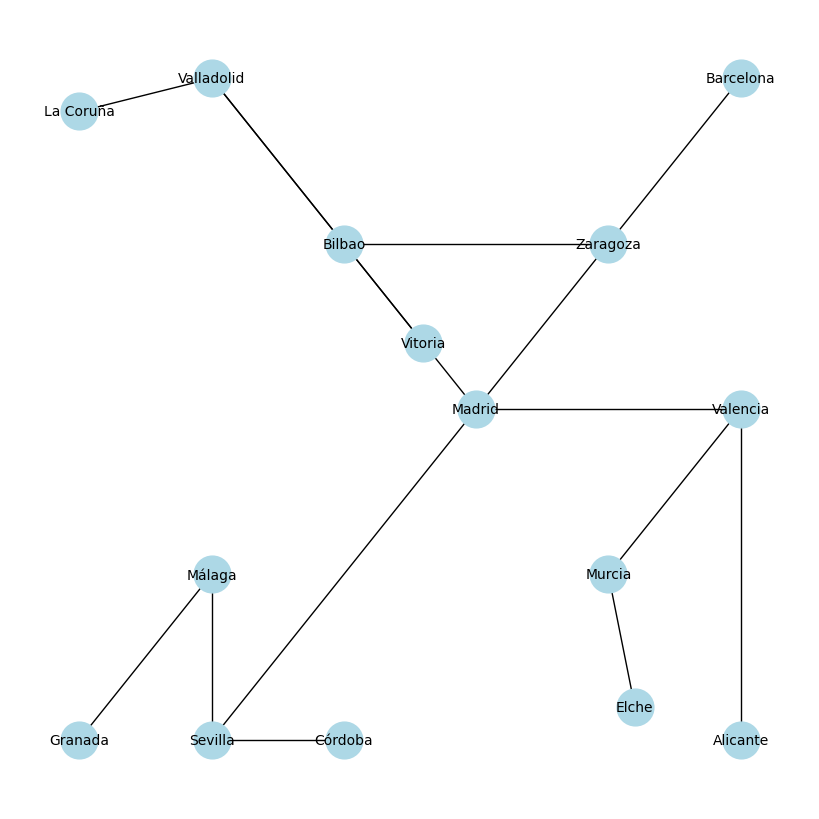

In [ ]:
def generate_tree_from_graph(graph, root_node):
    # Crear un grafo vacío para almacenar el árbol
    tree = nx.Graph()

    # Utilizar BFS para recorrer el grafo y construir el árbol
    visited = set()
    queue = [(None, root_node)]  # El primer elemento es el nodo padre, el segundo es el nodo actual

    while queue:
        parent, current_node = queue.pop(0)
        if current_node not in visited:
            visited.add(current_node)
            if parent is not None:
                # Añadir la arista al árbol
                distance = graph[parent][current_node]['weight']
                tree.add_edge(parent, current_node, distance=distance)

            for neighbor in graph[current_node]:
                if neighbor not in visited:
                    queue.append((current_node, neighbor))

    return tree

T = generate_tree_from_graph(G, 'La Coruña')

# Dibujar el grafo
plt.figure(figsize=(8, 8))
labels = nx.get_edge_attributes(T, 'weight')
nx.draw(T, pos, with_labels=True, node_color='lightblue', font_size=10, node_size=700)
nx.draw_networkx_edge_labels(T, pos, edge_labels=labels, font_size=8)

plt.show()


# **Crecimiento exponencial**
Crecimiento de naturaleza combinatoria del número de estados del problema de las N reinas.

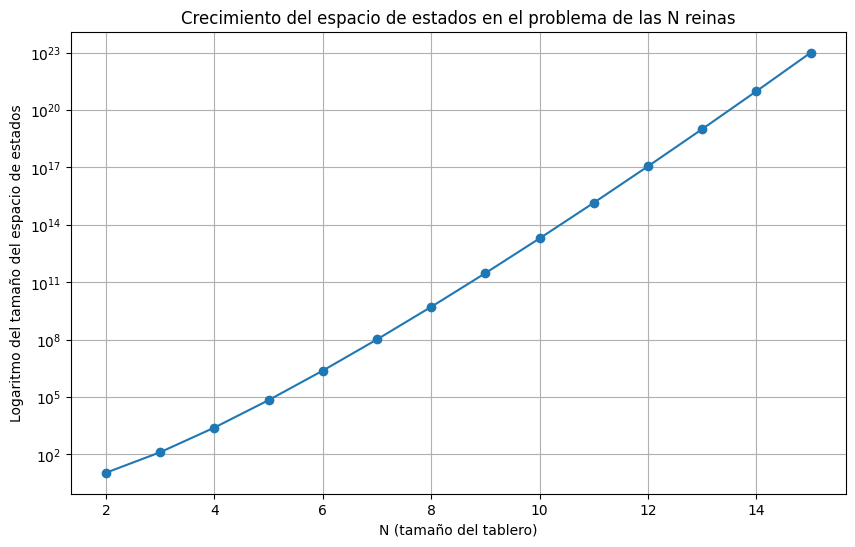

In [ ]:
import matplotlib.pyplot as plt
from scipy.special import comb

def state_space_size(N):
    return sum(comb(N * N, k) for k in range(N + 1))

N_values = list(range(2, 16))  # Aquí puedes extender el rango si lo deseas
sizes = [state_space_size(N) for N in N_values]

plt.figure(figsize=(10, 6))
plt.plot(N_values, sizes, marker='o')
plt.yscale("log")  # Escala logarítmica en el eje de las ordenadas
plt.xlabel('N (tamaño del tablero)')
plt.ylabel('Logaritmo del tamaño del espacio de estados')
plt.title('Crecimiento del espacio de estados en el problema de las N reinas')
plt.grid(True)
plt.show()

